# Task-1: House Price Prediction
### Name : CH DURGA PRASAD

In [1]:
# import the libraries
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("house_data.csv")

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
update=df.drop(['id','date'],axis=1)

In [5]:
update

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.describe

<bound method NDFrame.describe of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [7]:
# check the null values in the above dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

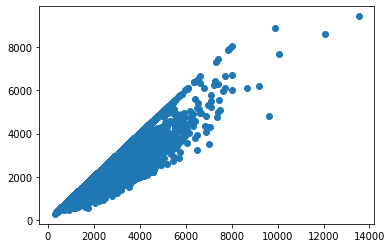

In [8]:
plt.scatter(update['sqft_living'],update['sqft_above'])
plt.show()

In [9]:
without=df.dropna()

In [10]:
without.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

In [11]:
x=without[['sqft_living']]
y=without['sqft_above']

In [12]:
model=LinearRegression()

In [13]:
# Fit the model
model.fit(x,y)

LinearRegression()

In [14]:
a=model.intercept_
a

144.36088112846323

In [15]:
b=model.coef_
a

144.36088112846323

In [16]:
y_predict=model.predict(x)
y_predict

array([1077.10042001, 2175.83597853,  753.01295311, ...,  950.6272622 ,
       1409.09245928,  950.6272622 ])

In [17]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


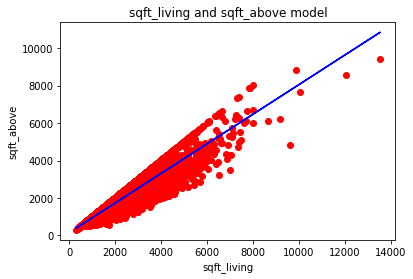

In [18]:
plt.scatter(x,y,c='r')
plt.plot(x['sqft_living'],y_predict,c='b')
plt.xlabel('sqft_living')
plt.ylabel('sqft_above')
plt.title('sqft_living and sqft_above model')
plt.show()

In [19]:
update[update['sqft_above'].isna()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,485000.0,4,1.0,1600,4300,1.5,0,0,4,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


In [20]:
model.predict(update[update['sqft_above'].isna()][['sqft_living']])

array([2958.38864251, 1409.09245928])

In [21]:
update.loc[update['sqft_above'].isna(),'sqft_above']=model.predict(update[update['sqft_above'].isna()][['sqft_living']])

In [22]:
update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [23]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [24]:
x=update.drop(columns=['price'],axis=1)
y=update['price']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [26]:
x_train.shape

(16209, 18)

In [27]:
model=LinearRegression()
model

LinearRegression()

In [28]:
model.fit(x_train,y_train)
a=model.intercept_
a

6005246.279775216

In [29]:
b=model.coef_
b

array([-4.13854467e+04,  4.81501035e+04,  3.61852390e+02,  1.44803029e-01,
        4.74254383e+03,  5.32541988e+05,  5.37107370e+04,  2.59159868e+04,
        9.39398993e+04, -1.79054245e+02, -2.10604528e+02, -2.62945610e+03,
        1.21173395e+01, -5.84584434e+02,  6.13059336e+05, -2.18365985e+05,
        2.19538606e+01, -3.69505557e-01])

In [30]:
y_predict=model.predict(x_test)
y_predict

array([507141.54220749, -54036.9731668 , 670813.02807576, ...,
       827357.61149358, 244649.48970604, 741864.42491636])

In [31]:
r2_score=r2_score(y_test,y_predict)

In [32]:
r2_score

0.7053063755758114

In [33]:
model.score(x_train,y_train)

0.6973278113554062

In [34]:
model.coef_

array([-4.13854467e+04,  4.81501035e+04,  3.61852390e+02,  1.44803029e-01,
        4.74254383e+03,  5.32541988e+05,  5.37107370e+04,  2.59159868e+04,
        9.39398993e+04, -1.79054245e+02, -2.10604528e+02, -2.62945610e+03,
        1.21173395e+01, -5.84584434e+02,  6.13059336e+05, -2.18365985e+05,
        2.19538606e+01, -3.69505557e-01])

In [35]:
x=df.bedrooms[0:(len(df)-1)]
y=df.bathrooms[0:(len(df)-1)]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=30)

In [37]:
#x_train = x_train.head(1000)
#y_train = y_train.head(1000)
x_train=np.array(x_train).reshape(1,-1)
y_train=np.array(y_train).reshape(1,-1)
x_train

array([[4, 2, 6, ..., 4, 3, 2]], dtype=int64)

In [38]:
y_train

array([[2.5 , 1.  , 3.25, ..., 2.5 , 2.  , 1.  ]])

In [39]:
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.intercept_
b=lr.coef_
print(a,b)

[2.5  1.   3.25 ... 2.5  2.   1.  ] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
x_test=np.array(x_test).reshape(1,-1)
y_test=np.array(y_test).reshape(1,-1)
predict = lr.predict(x_test)
predict

array([[2.5 , 1.  , 3.25, ..., 2.5 , 2.  , 1.  ]])

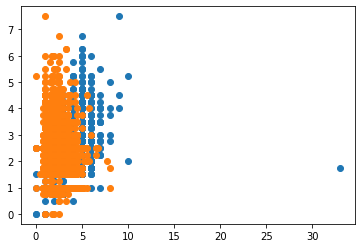

In [41]:
plt.scatter(x_test,y_test)
plt.scatter(predict,y_test)
plt.show()